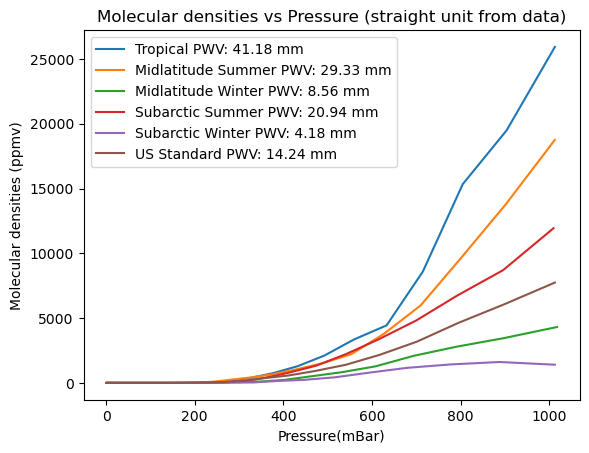

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp

#from pyrtlib.tb_spectrum import TbCloudRTE

from pyrtlib.utils import ppmv2gkg, mr2rh

def sumInte4const(X,s):
    """ this function is used to compute path-integrated quantities for constant X
    Use Trapezoidal rule
    """
    
    sumInte = 0

    for i in range(len(s)-1):

        # fix the negative out set delta s is positive

        del_s = np.abs( s[i+1]-s[i] ) 
        sum_X = X[i+1] + X[i] 

        sumInte += 0.5* sum_X * del_s 
    

    return sumInte

def PWV_from_mmix(rho,g,m_mix_kgkg,p_pa):
    """
    Calculate the precipitable water vapor from the mixing ratio.


    input:
        rho_w in kg/m^3
        g in m/s^2
        mass mixing ratio of water vapor in kg/kg
        pressure in Pa
        
    output:
        PWV in mm
    """
    sum_m_P_rho = sumInte4const(m_mix_kgkg,p_pa) 
    
    
    PWV_meter = sum_m_P_rho / (g*rho) # in m

    PWV = PWV_meter * 1000 # convert to mm

    return PWV


atms = [atmp.TROPICAL, atmp.MIDLATITUDE_SUMMER, atmp.MIDLATITUDE_WINTER, atmp.SUBARCTIC_SUMMER, atmp.SUBARCTIC_WINTER, atmp.US_STANDARD]

PWV_value = []
g = 9.8 # m/s^2
for atm in atms:
   z, p, _, t, md = atmp.gl_atm(atm)
   md_H2O = md[:,atmp.H2O]

   p_pa = p*1e2 # convert to Pa

   m_mix_gkg = ppmv2gkg(md_H2O,atmp.H2O) # convert to g/kg
   m_mix_kgkg = m_mix_gkg * 1e-3 # convert to kg/kg (g/g?)

   rho_w_liq = 1000 #kg/m^3
   PWV = PWV_from_mmix(rho_w_liq,g,m_mix_kgkg,p_pa)
   PWV = np.round(PWV,2)

   plt.plot(p, md_H2O, label=atmp.atm_profiles()[atm] + ' PWV: '+ str(PWV) + ' mm')
   plt.xlabel("Pressure(mBar)")
   plt.ylabel("Molecular densities (ppmv)")
   plt.title("Molecular densities vs Pressure (straight unit from data)")
   plt.legend()
   plt.grid()



plt.show()
